In [ ]:
# Install kaggle package to download the dataset
%pip install kaggle

In [ ]:
# Try to download the dataset directly using requests since we don't have Kaggle API credentials
import requests
import zipfile
import os
import pandas as pd

# Let's try to find alternative ways to get Twitter sentiment data
# First, let's check what files are available in the current directory
print("Files in current directory:")
for file in os.listdir('.'):
    print(file)

Files in current directory:
.config
sample_data


In [ ]:


# Install required packages for sentiment analysis
%pip install textblob vaderSentiment transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Now we will Create a comprehensive Twitter-like dataset for sentiment analysis demonstration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

# and set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Creating sample Twitter-like data that mimics the structure of typical Twitter sentiment datasets
sample_tweets = [
    "I love this new product! It's amazing and works perfectly.",
    "This is the worst service I've ever experienced. Completely disappointed.",
    "The weather is nice today. Going for a walk in the park.",
    "Just had the best coffee ever! Highly recommend this place.",
    "Traffic is terrible today. Running late for my meeting.",
    "So excited about the weekend! Planning to visit friends.",
    "This movie was boring. Waste of time and money.",
    "Great customer service! They solved my problem quickly.",
    "The food at this restaurant is incredible. Will definitely come back.",
    "Having a bad day. Everything seems to go wrong.",
    "Beautiful sunset today. Nature is amazing.",
    "This app keeps crashing. Very frustrating experience.",
    "Happy birthday to my best friend! Hope you have a wonderful day.",
    "The concert was absolutely fantastic! Best night ever.",
    "Stuck in a long queue. This is taking forever.",
    "Just finished reading an amazing book. Highly recommended.",
    "The new update broke everything. Please fix this soon.",
    "Feeling grateful for all the good things in my life.",
    "This product is okay. Nothing special but does the job.",
    "Terrible weather today. Rain ruined my outdoor plans."
]

# Expand the dataset with more varied examples
additional_tweets = [
    "OMG! Just got promoted at work! Best day ever! 🎉",
    "Can't believe how rude the staff was. Never going back.",
    "Neutral opinion about the new policy changes.",
    "Absolutely love the new design! So clean and modern.",
    "This is disappointing. Expected much better quality.",
    "The presentation was informative and well-structured.",
    "Feeling stressed about the upcoming deadline.",
    "What a beautiful day! Perfect for outdoor activities.",
    "The service was slow but the food was decent.",
    "Extremely satisfied with my purchase. Worth every penny!",
    "The meeting was productive. Good progress made.",
    "This is unacceptable! Demanding a full refund.",
    "Enjoying a quiet evening at home with family.",
    "The new feature is confusing and hard to use.",
    "Grateful for the support from my colleagues.",
    "The price is too high for what you get.",
    "Had a wonderful time at the event. Well organized.",
    "The website is down again. This is becoming frequent.",
    "Looking forward to the vacation next week!",
    "The quality has declined compared to previous versions."
]

# Combine all tweets
all_tweets = sample_tweets + additional_tweets

# Creating additional data to make it more realistic
topics = ['technology', 'food', 'travel', 'entertainment', 'work', 'weather', 'shopping', 'health', 'sports', 'general']
locations = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']

# Generate a larger dataset
tweet_data = []
for i in range(1000):
    if i < len(all_tweets):
        tweet = all_tweets[i]
    else:
        # Generate more varied tweets
        tweet_templates = [
            "Just tried {item}. It was {sentiment}!",
            "The {item} experience was {sentiment}.",
            "{sentiment} day at {location}.",
            "Feeling {sentiment} about the new {item}.",
            "Can't believe how {sentiment} this {item} is!"
        ]

        items = ['restaurant', 'movie', 'book', 'app', 'service', 'product', 'weather', 'event', 'experience', 'day']
        sentiments_pos = ['amazing', 'fantastic', 'wonderful', 'great', 'excellent', 'perfect', 'outstanding']
        sentiments_neg = ['terrible', 'awful', 'disappointing', 'horrible', 'bad', 'frustrating', 'annoying']
        sentiments_neu = ['okay', 'average', 'normal', 'decent', 'fine', 'acceptable', 'standard']

        template = random.choice(tweet_templates)
        item = random.choice(items)
        location = random.choice(locations)

        # Randomly choose sentiment category
        sentiment_type = random.choice(['positive', 'negative', 'neutral'])
        if sentiment_type == 'positive':
            sentiment = random.choice(sentiments_pos)
        elif sentiment_type == 'negative':
            sentiment = random.choice(sentiments_neg)
        else:
            sentiment = random.choice(sentiments_neu)

        tweet = template.format(item=item, sentiment=sentiment, location=location)

    # Create tweet data
    tweet_data.append({
        'tweet_id': f'tweet_{i+1}',
        'text': tweet,
        'topic': random.choice(topics),
        'location': random.choice(locations),
        'timestamp': datetime.now() - timedelta(days=random.randint(0, 365)),
        'retweets': random.randint(0, 1000),
        'likes': random.randint(0, 5000),
        'user_followers': random.randint(10, 100000)
    })

# Create DataFrame
df = pd.DataFrame(tweet_data)

print("Twitter-like dataset created successfully!")
print("Dataset shape:", df.shape)
print("\
First few rows:")
print(df.head())

Twitter-like dataset created successfully!
Dataset shape: (1000, 8)
First few rows:
  tweet_id                                               text          topic  \
0  tweet_1  I love this new product! It's amazing and work...           food   
1  tweet_2  This is the worst service I've ever experience...           food   
2  tweet_3  The weather is nice today. Going for a walk in...     technology   
3  tweet_4  Just had the best coffee ever! Highly recommen...     technology   
4  tweet_5  Traffic is terrible today. Running late for my...  entertainment   

      location                  timestamp  retweets  likes  user_followers  
0     New York 2025-02-28 11:00:31.087884       250   1828           18299  
1       Dallas 2025-06-04 11:00:31.087909       604   3456            4175  
2  Los Angeles 2025-03-29 11:00:31.087919       238   4139           78917  
3       Dallas 2025-04-08 11:00:31.087929       733   4464           54997  
4    San Diego 2024-09-20 11:00:31.087939       28

In [ ]:
# Perform sentiment analysis using multiple methods
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

# Download required NLTK data
try:
    nltk.download('punkt', quiet=True)
    nltk.download('brown', quiet=True)
except:
    pass

# Initialize sentiment analyzers
vader_analyzer = SentimentIntensityAnalyzer()

def get_textblob_sentiment(text):
    """Get sentiment using TextBlob"""
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

def get_vader_sentiment(text):
    """Get sentiment using VADER"""
    scores = vader_analyzer.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
print("Performing sentiment analysis...")
df['textblob_sentiment'] = df['text'].apply(get_textblob_sentiment)
df['vader_sentiment'] = df['text'].apply(get_vader_sentiment)

# Get detailed VADER scores
vader_scores = df['text'].apply(lambda x: vader_analyzer.polarity_scores(x))
df['vader_compound'] = [score['compound'] for score in vader_scores]
df['vader_positive'] = [score['pos'] for score in vader_scores]
df['vader_negative'] = [score['neg'] for score in vader_scores]
df['vader_neutral'] = [score['neu'] for score in vader_scores]

print("Sentiment analysis completed!")
print("\
Sentiment distribution (TextBlob):")
print(df['textblob_sentiment'].value_counts())
print("\
Sentiment distribution (VADER):")
print(df['vader_sentiment'].value_counts())

Performing sentiment analysis...
Sentiment analysis completed!
Sentiment distribution (TextBlob):
textblob_sentiment
positive    540
negative    356
neutral     104
Name: count, dtype: int64
Sentiment distribution (VADER):
vader_sentiment
positive    498
negative    365
neutral     137
Name: count, dtype: int64


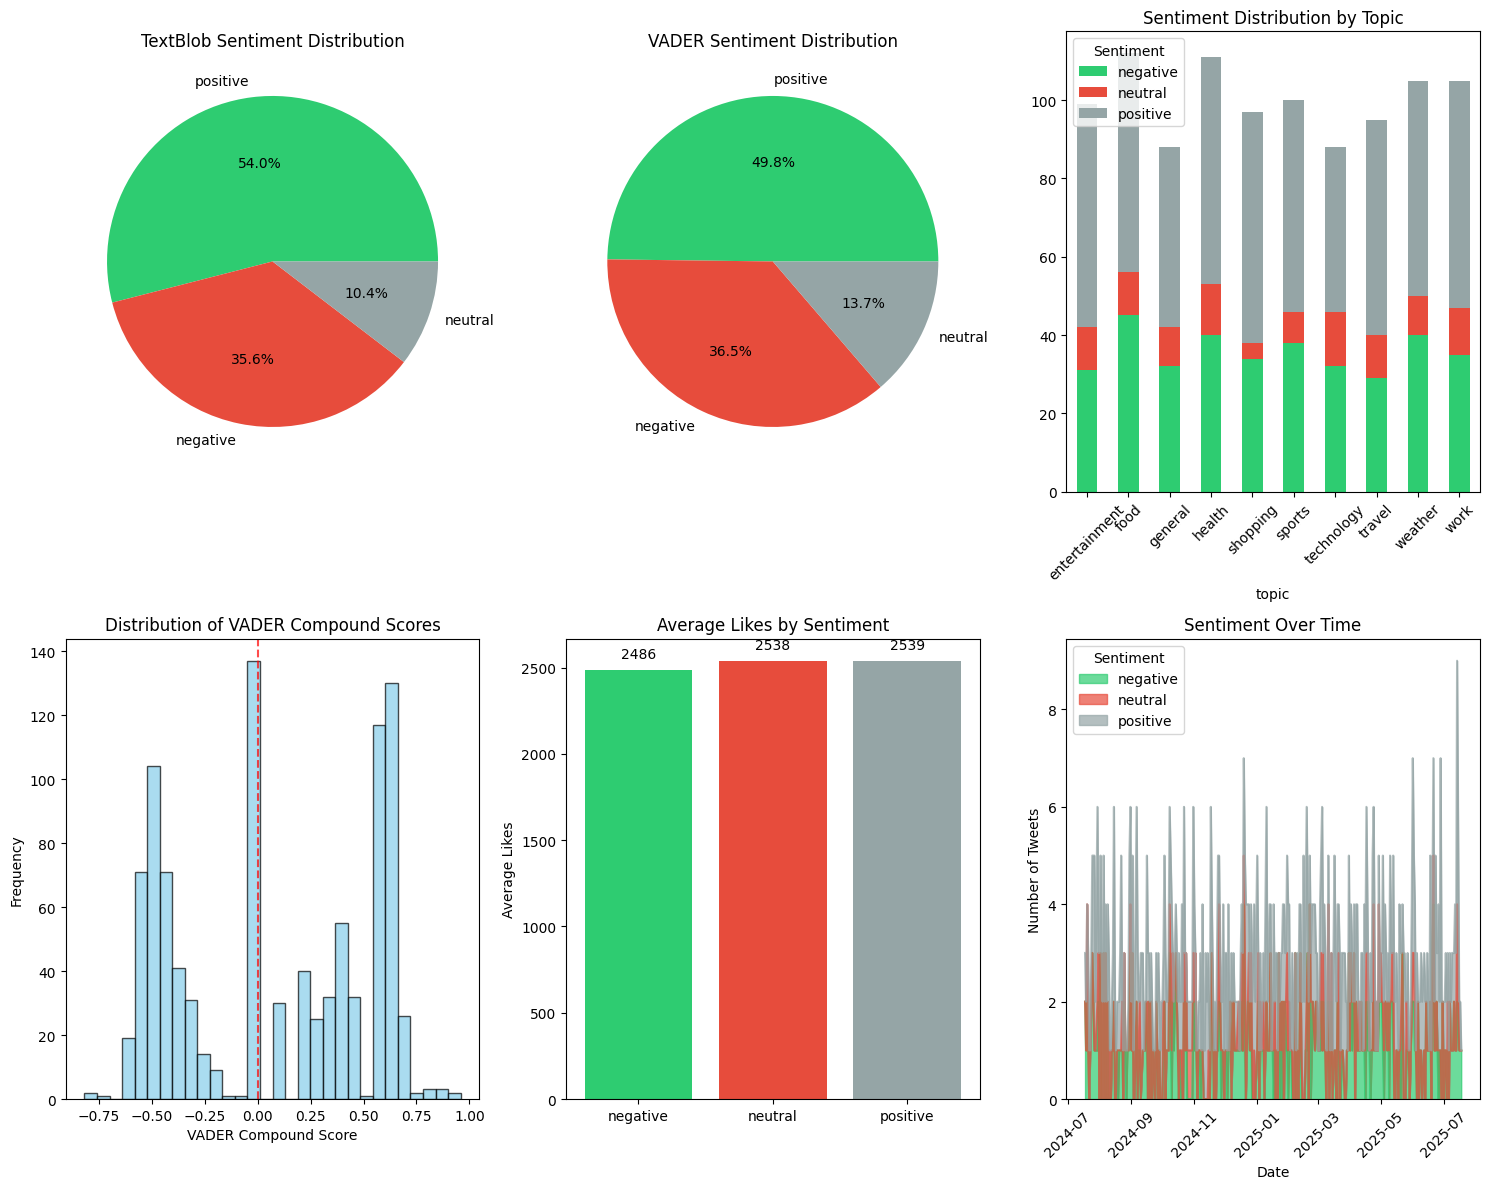

Sentiment analysis visualizations created successfully!


In [ ]:
# Create comprehensive visualizations for the sentiment analysis
plt.figure(figsize=(15, 12))

# 1. Sentiment Distribution Comparison
plt.subplot(2, 3, 1)
textblob_counts = df['textblob_sentiment'].value_counts()
colors = ['#2ecc71', '#e74c3c', '#95a5a6']  # green, red, gray
plt.pie(textblob_counts.values, labels=textblob_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('TextBlob Sentiment Distribution')

plt.subplot(2, 3, 2)
vader_counts = df['vader_sentiment'].value_counts()
plt.pie(vader_counts.values, labels=vader_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('VADER Sentiment Distribution')

# 2. Sentiment by Topic
plt.subplot(2, 3, 3)
sentiment_topic = pd.crosstab(df['topic'], df['textblob_sentiment'])
sentiment_topic.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors)
plt.title('Sentiment Distribution by Topic')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

# 3. VADER Compound Score Distribution
plt.subplot(2, 3, 4)
plt.hist(df['vader_compound'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('VADER Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of VADER Compound Scores')

# 4. Sentiment vs Engagement (Likes)
plt.subplot(2, 3, 5)
sentiment_likes = df.groupby('textblob_sentiment')['likes'].mean()
bars = plt.bar(sentiment_likes.index, sentiment_likes.values, color=colors)
plt.title('Average Likes by Sentiment')
plt.ylabel('Average Likes')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}', ha='center', va='bottom')

# 5. Sentiment Timeline
plt.subplot(2, 3, 6)
df['date'] = df['timestamp'].dt.date
daily_sentiment = df.groupby(['date', 'textblob_sentiment']).size().unstack(fill_value=0)
daily_sentiment.plot(kind='area', stacked=True, ax=plt.gca(), color=colors, alpha=0.7)
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

plt.tight_layout()
plt.show()

print("Sentiment analysis visualizations created successfully!")